In [135]:
# Tratamiento de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
import scipy.stats as stats
from scipy.stats import chi2_contingency, ttest_ind, kstest
from scipy.stats import mannwhitneyu

# Configuración
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames


# Gestión de los warnings
import warnings
warnings.filterwarnings("ignore")

In [47]:
df = pd.read_csv("../../files/df_nulos_imputados.csv", index_col=0)

In [48]:
df.head()

,EmployeeID,Age,Gender,MaritalStatus,DateBirth,Education,EducationField,NumCompaniesWorked,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Attrition,OverTime,DistanceFromHome,RemoteWork,BusinessTravel,TrainingTimesLastYear,JobRole,JobLevel,DailyRate,HourlyRate,MonthlyRate,PercentSalaryHike,StockOptionLevel,Salary
0,162,51,Male,Unknown,1972,3,Unknown,7,11.144344,20,15,15,1,3,3,3.000000,3,3.0,No,0.000000,6,1,Unknown,5,research director,5,684.0,51.0,6462.0,13,0,1000000000
1,259,52,Male,Unknown,1971,4,Life Sciences,0,34.000000,33,11,9,3,3,1,3.000000,2,3.0,No,0.265372,1,1,Unknown,5,manager,5,699.0,65.0,5678.0,14,1,1000000000
2,319,42,Male,Married,1981,2,Technical Degree,1,22.000000,22,11,15,3,4,4,2.787874,3,3.0,No,0.000000,4,1,travel_rarely,3,manager,5,532.0,58.0,4933.0,11,0,1000000000
3,nan1,47,Female,Married,1976,4,Medical,3,10.844380,20,5,6,1,3,2,2.793950,3,3.0,No,0.257984,2,0,travel_rarely,2,research director,4,359.0,82.0,26703.0,19,2,1000000000
4,nan2,46,Female,Divorced,1977,3,Technical Degree,2,11.732127,19,2,8,1,1,4,3.000000,4,3.0,No,0.000000,3,0,Unknown,5,sales executive,4,1319.0,45.0,7739.0,12,1,1000000000


Vamos a comparar cada una de las columnas de satisfacción ('EnvironmentSatisfaction','RelationshipSatisfaction' y JobSatisfaction) con la columna de attrition, para ver si alguna de ellas tiene relación con que los empleados se hayan ido de la empresa o no. 

## EnvironmentSatisfaction

In [49]:
#empezamos con EnvironmentSatisfaction. Creamos una nueva columna a la que llamaremos TestGroupES, y crearemos dos grupos: 
#satisfechos, los que tienen un índice de satisfacción de 3 o 4; e insatisfechos, los que tienen un índice de satisfacción menos que 3
df['TestGroupES'] = df['EnvironmentSatisfaction'].apply(lambda x : 'satisfechos' if x >= 3 else 'insatisfechos')

In [50]:
df.head(5)

,EmployeeID,Age,Gender,MaritalStatus,DateBirth,Education,EducationField,NumCompaniesWorked,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Attrition,OverTime,DistanceFromHome,RemoteWork,BusinessTravel,TrainingTimesLastYear,JobRole,JobLevel,DailyRate,HourlyRate,MonthlyRate,PercentSalaryHike,StockOptionLevel,Salary,TestGroupES
0,162,51,Male,Unknown,1972,3,Unknown,7,11.144344,20,15,15,1,3,3,3.000000,3,3.0,No,0.000000,6,1,Unknown,5,research director,5,684.0,51.0,6462.0,13,0,1000000000,insatisfechos
1,259,52,Male,Unknown,1971,4,Life Sciences,0,34.000000,33,11,9,3,3,1,3.000000,2,3.0,No,0.265372,1,1,Unknown,5,manager,5,699.0,65.0,5678.0,14,1,1000000000,satisfechos
2,319,42,Male,Married,1981,2,Technical Degree,1,22.000000,22,11,15,3,4,4,2.787874,3,3.0,No,0.000000,4,1,travel_rarely,3,manager,5,532.0,58.0,4933.0,11,0,1000000000,satisfechos
3,nan1,47,Female,Married,1976,4,Medical,3,10.844380,20,5,6,1,3,2,2.793950,3,3.0,No,0.257984,2,0,travel_rarely,2,research director,4,359.0,82.0,26703.0,19,2,1000000000,insatisfechos
4,nan2,46,Female,Divorced,1977,3,Technical Degree,2,11.732127,19,2,8,1,1,4,3.000000,4,3.0,No,0.000000,3,0,Unknown,5,sales executive,4,1319.0,45.0,7739.0,12,1,1000000000,insatisfechos


In [51]:
tabla_contingencia_porcentaje_ES = pd.crosstab(df['TestGroupES'], df['Attrition'], normalize = True) * 100
tabla_contingencia_ES = pd.crosstab(df['TestGroupES'], df['Attrition']) 
tabla_contingencia_ES

Attrition,No,Yes
TestGroupES,,
insatisfechos,495,126
satisfechos,816,126


In [52]:
tabla_contingencia_porcentaje_ES

Attrition,No,Yes
TestGroupES,,
insatisfechos,31.669866,8.06142
satisfechos,52.207294,8.06142


H0 = No existe diferencia signiticativa entre ambos grupos

H1 = Existe diferencia significativa entre ambos grupos

p-value < 0.05 rechazamos h0

p-value > 0.05 aceptamos h0

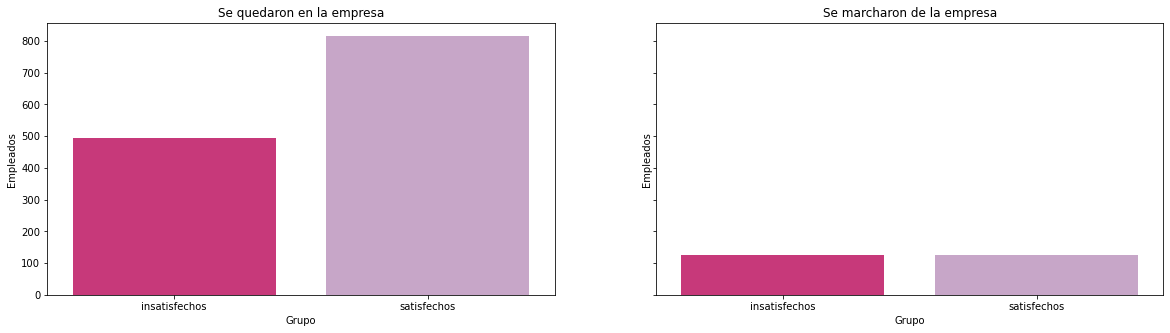

In [53]:
# hacemos un análisis visual previo
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5), sharey=True)

sns.barplot(x=tabla_contingencia_ES.index, y="No", data=tabla_contingencia_ES,  palette = "PuRd_r", ax = axes[0])
sns.barplot(x=tabla_contingencia_ES.index, y="Yes", data=tabla_contingencia_ES,  palette = "PuRd_r", ax = axes[1])

axes[0].set_title("Se quedaron en la empresa")
axes[1].set_title("Se marcharon de la empresa")

axes[0].set_xlabel("Grupo")
axes[0].set_ylabel("Empleados")

axes[1].set_xlabel("Grupo")
axes[1].set_ylabel("Empleados");

In [54]:
# Realizar la prueba de proporciones
chi2, p_value, _, _ = chi2_contingency(tabla_contingencia_ES)

# Imprimir el resultado de la prueba
alpha = 0.05
if p_value < alpha:
    print(f"Con un p_value de {p_value} hay una diferencia significativa en la cantidad de attrition según el grupo")
else:
    print(f"Con un p_value de {p_value} no hay una diferencia significativa en la cantidad de attrition según el grupo")

Con un p_value de 0.00036102930718814543 hay una diferencia significativa en la cantidad de attrition según el grupo


**Análisis**: 
- Rechazamos la hipótesis nula. 
- Observamos una diferencia significativa en ambos grupos (satisfechos e insatisfechos). 
- Podemos concluir que el ambiente de trabajo (EnvironmentSatisfaction) sí influye en la rotación de empleados.


## JobSatisfaction

In [55]:
#Veamos ahora qué ocurre con JobSatisfaction. Creamos una nueva columna a la que llamaremos TestGroupJS, y crearemos dos grupos: 
#satisfechos, los que tienen un índice de satisfacción de 3 o 4; e insatisfechos, los que tienen un índice de satisfacción menos que 3
df['TestGroupJS'] = df['JobSatisfaction'].apply(lambda x : 'satisfechos' if x >= 3 else 'insatisfechos')

In [56]:
df.head(5)

,EmployeeID,Age,Gender,MaritalStatus,DateBirth,Education,EducationField,NumCompaniesWorked,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Attrition,OverTime,DistanceFromHome,RemoteWork,BusinessTravel,TrainingTimesLastYear,JobRole,JobLevel,DailyRate,HourlyRate,MonthlyRate,PercentSalaryHike,StockOptionLevel,Salary,TestGroupES,TestGroupJS
0,162,51,Male,Unknown,1972,3,Unknown,7,11.144344,20,15,15,1,3,3,3.000000,3,3.0,No,0.000000,6,1,Unknown,5,research director,5,684.0,51.0,6462.0,13,0,1000000000,insatisfechos,satisfechos
1,259,52,Male,Unknown,1971,4,Life Sciences,0,34.000000,33,11,9,3,3,1,3.000000,2,3.0,No,0.265372,1,1,Unknown,5,manager,5,699.0,65.0,5678.0,14,1,1000000000,satisfechos,satisfechos
2,319,42,Male,Married,1981,2,Technical Degree,1,22.000000,22,11,15,3,4,4,2.787874,3,3.0,No,0.000000,4,1,travel_rarely,3,manager,5,532.0,58.0,4933.0,11,0,1000000000,satisfechos,satisfechos
3,nan1,47,Female,Married,1976,4,Medical,3,10.844380,20,5,6,1,3,2,2.793950,3,3.0,No,0.257984,2,0,travel_rarely,2,research director,4,359.0,82.0,26703.0,19,2,1000000000,insatisfechos,satisfechos
4,nan2,46,Female,Divorced,1977,3,Technical Degree,2,11.732127,19,2,8,1,1,4,3.000000,4,3.0,No,0.000000,3,0,Unknown,5,sales executive,4,1319.0,45.0,7739.0,12,1,1000000000,insatisfechos,insatisfechos


In [57]:
tabla_contingencia_porcentaje_JS = pd.crosstab(df['TestGroupJS'], df['Attrition'], normalize = True) * 100
tabla_contingencia_JS = pd.crosstab(df['TestGroupJS'], df['Attrition']) 
tabla_contingencia_JS

Attrition,No,Yes
TestGroupJS,,
insatisfechos,486,121
satisfechos,825,131


In [58]:
#lo vemos en porcentaje
tabla_contingencia_porcentaje_JS

Attrition,No,Yes
TestGroupJS,,
insatisfechos,31.094050,7.741523
satisfechos,52.783109,8.381318


H0 = No existe diferencia signiticativa entre ambos grupos

H1 = Existe diferencia significativa entre ambos grupos

p-value < 0.05 rechazamos h0

p-value > 0.05 aceptamos h0

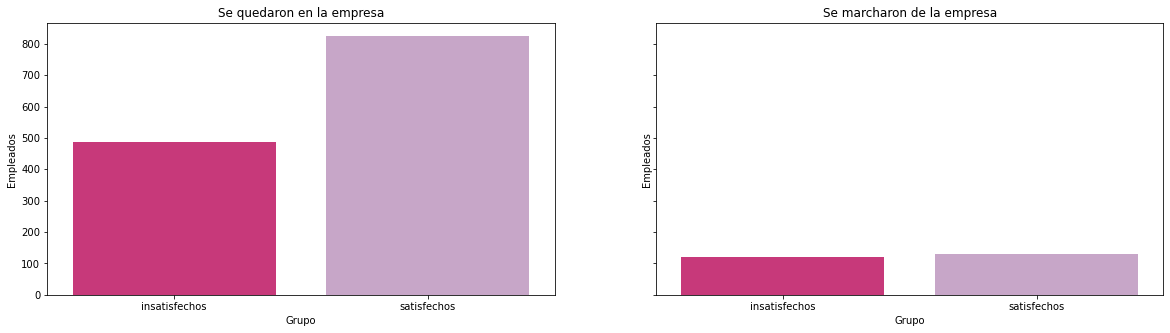

In [59]:
# hacemos un análisis visual previo
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5), sharey=True)

sns.barplot(x=tabla_contingencia_JS.index, y="No", data=tabla_contingencia_JS,  palette = "PuRd_r", ax = axes[0])
sns.barplot(x=tabla_contingencia_JS.index, y="Yes", data=tabla_contingencia_JS,  palette = "PuRd_r", ax = axes[1])

axes[0].set_title("Se quedaron en la empresa")
axes[1].set_title("Se marcharon de la empresa")

axes[0].set_xlabel("Grupo")
axes[0].set_ylabel("Empleados")

axes[1].set_xlabel("Grupo")
axes[1].set_ylabel("Empleados");

In [60]:
# Realizar la prueba de proporciones
chi2, p_value, _, _ = chi2_contingency(tabla_contingencia_JS)

# Imprimir el resultado de la prueba
alpha = 0.05
if p_value < alpha:
    print(f"Con un p_value de {p_value} hay una diferencia significativa en la cantidad de attrition según el grupo")
else:
    print(f"Con un p_value de {p_value} no hay una diferencia significativa en la cantidad de attrition según el grupo")

Con un p_value de 0.0014014887471835308 hay una diferencia significativa en la cantidad de attrition según el grupo


**Análisis**: 
- A priori sí vemos una diferencia en el attrition según el grupo al que pertenecen los empleados (gráfico)
- Tras realizar el test del chi-quadrado, comprobamos que podemos rechazar la hipótesis nula, es decir, que existe una diferencia signiticativa entre ambos grupos (satisfechos e insatisfechos)
- La columna de Jobsatisfaction nos indica que es una factor que sí influye en que haya rotación de empleados

## RelationshipSatisfaction

In [61]:
#Veamos ahora qué ocurre con RelationshipSatisfaction. Creamos una nueva columna a la que llamaremos TestGroupRS, y crearemos dos grupos: 
#satisfechos, los que tienen un índice de satisfacción de 3 o 4; e insatisfechos, los que tienen un índice de satisfacción menos que 3
df['TestGroupRS'] = df['RelationshipSatisfaction'].apply(lambda x : 'satisfechos' if x >= 3 else 'insatisfechos')

In [62]:
df.head(5)

,EmployeeID,Age,Gender,MaritalStatus,DateBirth,Education,EducationField,NumCompaniesWorked,TotalWorkingYears,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,Attrition,OverTime,DistanceFromHome,RemoteWork,BusinessTravel,TrainingTimesLastYear,JobRole,JobLevel,DailyRate,HourlyRate,MonthlyRate,PercentSalaryHike,StockOptionLevel,Salary,TestGroupES,TestGroupJS,TestGroupRS
0,162,51,Male,Unknown,1972,3,Unknown,7,11.144344,20,15,15,1,3,3,3.000000,3,3.0,No,0.000000,6,1,Unknown,5,research director,5,684.0,51.0,6462.0,13,0,1000000000,insatisfechos,satisfechos,satisfechos
1,259,52,Male,Unknown,1971,4,Life Sciences,0,34.000000,33,11,9,3,3,1,3.000000,2,3.0,No,0.265372,1,1,Unknown,5,manager,5,699.0,65.0,5678.0,14,1,1000000000,satisfechos,satisfechos,insatisfechos
2,319,42,Male,Married,1981,2,Technical Degree,1,22.000000,22,11,15,3,4,4,2.787874,3,3.0,No,0.000000,4,1,travel_rarely,3,manager,5,532.0,58.0,4933.0,11,0,1000000000,satisfechos,satisfechos,satisfechos
3,nan1,47,Female,Married,1976,4,Medical,3,10.844380,20,5,6,1,3,2,2.793950,3,3.0,No,0.257984,2,0,travel_rarely,2,research director,4,359.0,82.0,26703.0,19,2,1000000000,insatisfechos,satisfechos,insatisfechos
4,nan2,46,Female,Divorced,1977,3,Technical Degree,2,11.732127,19,2,8,1,1,4,3.000000,4,3.0,No,0.000000,3,0,Unknown,5,sales executive,4,1319.0,45.0,7739.0,12,1,1000000000,insatisfechos,insatisfechos,satisfechos


In [63]:
tabla_contingencia_porcentaje_RS = pd.crosstab(df['TestGroupRS'], df['Attrition'], normalize = True) * 100
tabla_contingencia_RS = pd.crosstab(df['TestGroupRS'], df['Attrition']) 
tabla_contingencia_RS

Attrition,No,Yes
TestGroupRS,,
insatisfechos,511,106
satisfechos,800,146


In [64]:
tabla_contingencia_porcentaje_RS

Attrition,No,Yes
TestGroupRS,,
insatisfechos,32.693538,6.781830
satisfechos,51.183621,9.341011


H0 = No existe diferencia signiticativa entre ambos grupos

H1 = Existe diferencia significativa entre ambos grupos

p-value < 0.05 rechazamos h0

p-value > 0.05 aceptamos h0

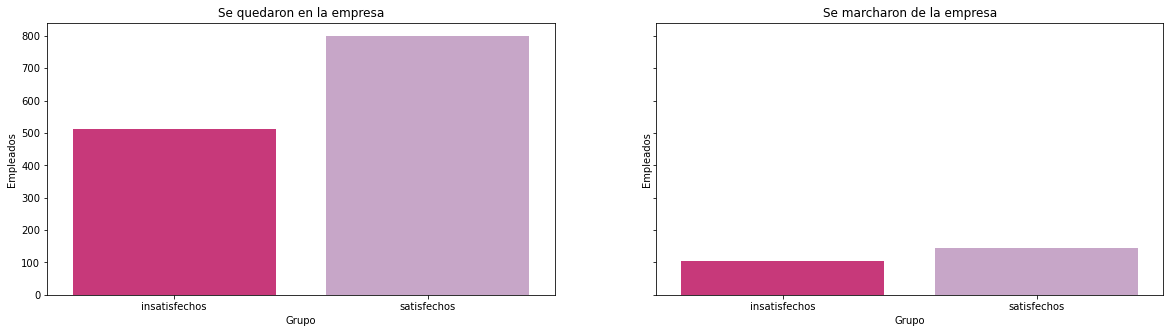

In [65]:
# hacemos un análisis visual previo
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5), sharey=True)

sns.barplot(x=tabla_contingencia_RS.index, y="No", data=tabla_contingencia_RS,  palette = "PuRd_r", ax = axes[0])
sns.barplot(x=tabla_contingencia_RS.index, y="Yes", data=tabla_contingencia_RS,  palette = "PuRd_r", ax = axes[1])

axes[0].set_title("Se quedaron en la empresa")
axes[1].set_title("Se marcharon de la empresa")

axes[0].set_xlabel("Grupo")
axes[0].set_ylabel("Empleados")

axes[1].set_xlabel("Grupo")
axes[1].set_ylabel("Empleados");

In [66]:
# Realizar la prueba de proporciones
chi2, p_value, _, _ = chi2_contingency(tabla_contingencia_RS)

# Imprimir el resultado de la prueba
alpha = 0.05
if p_value < alpha:
    print(f"Con un p_value de {p_value} hay una diferencia significativa en la cantidad de attrition según el grupo")
else:
    print(f"Con un p_value de {p_value} no hay una diferencia significativa en la cantidad de attrition según el grupo")

Con un p_value de 0.3967654071376123 no hay una diferencia significativa en la cantidad de attrition según el grupo


**Análisis**: 
- A priori sí vemos una diferencia en el attrition según el grupo al que pertenecen los empleados, pero al realizar el análisis (y dado el posible impacto del total de insatisfechos) esta diferencia no resulta ser significativa
- No podemos rechazar la hipótesis nula, ya que no existe una diferencia signiticativa entre ambos grupos (satisfechos e insatisfechos)
- Observamos que hay una elevada cantidad de empleados comprendidos dentro de 'insatisfechos'

## TotalWorkingYears

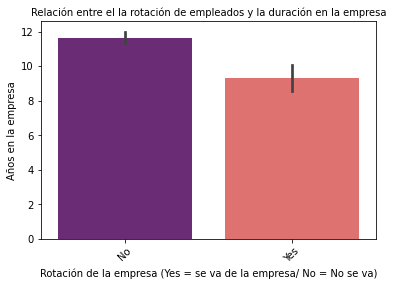

In [86]:
#realizamos un gráfico para visualizar como se distribuyen los salarios en función del nivel educativo

sns.barplot(x = "Attrition", 
               y = "TotalWorkingYears", 
               data = df,
               palette = "magma")


plt.xlabel("Rotación de la empresa (Yes = se va de la empresa/ No = No se va)")
plt.ylabel("Años en la empresa")
plt.xticks(rotation = 45)
plt.title("Relación entre el la rotación de empleados y la duración en la empresa", fontsize = 10);

In [ ]:
# En el gráfico observamos que parece existir una relación entre los años que un empleado lleva en la empresa y la rotación (a mayor número de años en la empresa, menor rotación)
# Vamos a comprobar si existe una diferencia significativa

In [67]:
#Vamos a estudiar la normalidad de esta variable, para ver si podemos aplicar el test de student. 

# lo primero que hacemos es crear una función para testar la normalidad de los datos
def normalidad(dataframe, columna):
    """
    Evalúa la normalidad de una columna de datos de un DataFrame utilizando la prueba de Shapiro-Wilk.

    Parámetros:
        dataframe (DataFrame): El DataFrame que contiene los datos.
        columna (str): El nombre de la columna en el DataFrame que se va a evaluar para la normalidad.

    Returns:
        None: Imprime un mensaje indicando si los datos siguen o no una distribución normal.
    """

    statistic, p_value = stats.shapiro(dataframe[columna])
    if p_value > 0.05:
        print(f"Para la columna {columna} los datos siguen una distribución normal.")
    else:
        print(f"Para la columna {columna} los datos no siguen una distribución normal.")

In [68]:
normalidad(df ,'TotalWorkingYears')

Para la columna TotalWorkingYears los datos no siguen una distribución normal.


In [ ]:
# Como los datos no siguen una distribución normal, tenemos que hacer una prueba no paramétrica, en este caso Mann Whitney

In [83]:
grupo_si = df[df['Attrition'] == 'Yes']['TotalWorkingYears']
grupo_no = df[df['Attrition'] == 'No']['TotalWorkingYears']

In [84]:
# Realizar el test de Mann-Whitney U

stat, p_value = mannwhitneyu(grupo_si, grupo_no)

# Imprimir los resultados
print("Estadística de prueba U:", stat)
print("Valor p:", p_value)

# Interpretar los resultados
if p_value < 0.05:
    print("Hay evidencia estadística para rechazar la hipótesis nula. Hay diferencias significativas entre los grupos.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula. No hay diferencias significativas entre los grupos.")




Estadística de prueba U: 131490.0
Valor p: 2.7706623639012144e-07
Hay evidencia estadística para rechazar la hipótesis nula. Hay diferencias significativas entre los grupos.


## HourlyRate

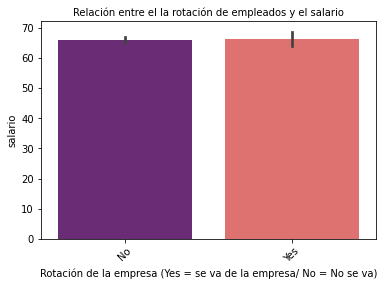

In [97]:

sns.barplot(x = "Attrition", 
               y = "HourlyRate", 
               data = df,
               palette = "magma")


plt.xlabel("Rotación de la empresa (Yes = se va de la empresa/ No = No se va)")
plt.ylabel("salario")
plt.xticks(rotation = 45)
plt.title("Relación entre el la rotación de empleados y el salario", fontsize = 10);

In [ ]:
# a simple vista no parece existir una relación entre ambas. 

In [98]:
#Vamos a estudiar la normalidad de esta variable, para ver si podemos aplicar el test de student. 

# lo primero que hacemos es crear una función para testar la normalidad de los datos
def normalidad(dataframe, columna):
    """
    Evalúa la normalidad de una columna de datos de un DataFrame utilizando la prueba de Shapiro-Wilk.

    Parámetros:
        dataframe (DataFrame): El DataFrame que contiene los datos.
        columna (str): El nombre de la columna en el DataFrame que se va a evaluar para la normalidad.

    Returns:
        None: Imprime un mensaje indicando si los datos siguen o no una distribución normal.
    """

    statistic, p_value = stats.shapiro(dataframe[columna])
    if p_value > 0.05:
        print(f"Para la columna {columna} los datos siguen una distribución normal.")
    else:
        print(f"Para la columna {columna} los datos no siguen una distribución normal.")

In [100]:
normalidad(df ,'HourlyRate')

Para la columna HourlyRate los datos no siguen una distribución normal.


In [103]:
grupo_si_hr = df[df['Attrition'] == 'Yes']['HourlyRate']
grupo_no_hr = df[df['Attrition'] == 'No']['HourlyRate']

In [104]:
# Realizar el test de Mann-Whitney U

stat, p_value = mannwhitneyu(grupo_si_hr, grupo_no_hr)

# Imprimir los resultados
print("Estadística de prueba U:", stat)
print("Valor p:", p_value)

# Interpretar los resultados
if p_value < 0.05:
    print("Hay evidencia estadística para rechazar la hipótesis nula. Hay diferencias significativas entre los grupos.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula. No hay diferencias significativas entre los grupos.")


Estadística de prueba U: 167196.5
Valor p: 0.7593434491480296
No hay suficiente evidencia para rechazar la hipótesis nula. No hay diferencias significativas entre los grupos.


## RemoteWork

# Tenemos dos grupos: 
- 0: no teletrabajan
- 1: teletrabajan
sospechamos que puede haber diferencias entre la rotación de ambos grupos. 

In [110]:
# la columna 'RemoteWork' aparece como una variable numérica, pero es posible que es más útil transformarla en una variable categórica.
# Definimos el diccionario de mapeo
teletrabajo = {
    0: 'No',
    1: 'Si'
}

# Aplicar el mapeo a la columna del DataFrame
df['RemoteWork'] = df['RemoteWork'].map(teletrabajo)

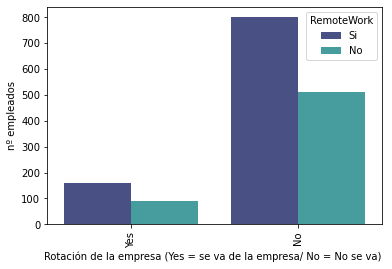

In [126]:
sns.countplot(x = 'Attrition',
              data = df,
              palette = "mako",
              order = ['Yes', 'No'],
              hue = "RemoteWork")
# giramos las etiquetas del eje "x",
plt.xticks(rotation = 90)
# cambiamos el nombre de los ejes usando los métodos 'plt.ylabel()' y 'plt.xlabel()'
plt.xlabel("Rotación de la empresa (Yes = se va de la empresa/ No = No se va) ")
plt.ylabel("nº empleados");

In [ ]:
# el teletrabajo es un factor que parece influir en la rotación de empleados. Sospechamos que a mayor número de empleados teletrabajando, menor rotación.

In [132]:
tabla_contingencia = pd.crosstab(df['Attrition'], df['RemoteWork']) 
tabla_contingencia 

RemoteWork,No,Si
Attrition,,
No,511,800
Yes,91,161


In [ ]:
#ho =no hay diferencia entre las dos paginas
#h1 = sí hay diferencia 

#necesitamos conocer el p-Value
#p-value < 0.05 rechazamos h0 : existe una diferencia significativa
#p-value > 0.05 aceptamos h0 : no existe diferencia significativa

In [129]:
#hacemos el chi cuadrado

chi2, p_value, _, _ = chi2_contingency (tabla_contingencia)
#el chi cuadrado nos devuelve varias cosas, pero sólo nos interesa el p-value

print (p_value)

#p_value > 0.05 aceptamos H0, no hay diferencias significativas 

0.43198392829339605


## YearsSinceLastPromotion

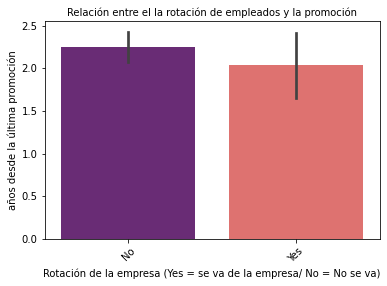

In [140]:
sns.barplot(x = "Attrition", 
               y = "YearsSinceLastPromotion", 
               data = df,
               palette = "magma")


plt.xlabel("Rotación de la empresa (Yes = se va de la empresa/ No = No se va)")
plt.ylabel("años desde la última promoción")
plt.xticks(rotation = 45)
plt.title("Relación entre el la rotación de empleados y la promoción", fontsize = 10);

In [141]:
#Vamos a estudiar la normalidad de esta variable, para ver si podemos aplicar el test de student. 

# lo primero que hacemos es crear una función para testar la normalidad de los datos
def normalidad(dataframe, columna):
    """
    Evalúa la normalidad de una columna de datos de un DataFrame utilizando la prueba de Shapiro-Wilk.

    Parámetros:
        dataframe (DataFrame): El DataFrame que contiene los datos.
        columna (str): El nombre de la columna en el DataFrame que se va a evaluar para la normalidad.

    Returns:
        None: Imprime un mensaje indicando si los datos siguen o no una distribución normal.
    """

    statistic, p_value = stats.shapiro(dataframe[columna])
    if p_value > 0.05:
        print(f"Para la columna {columna} los datos siguen una distribución normal.")
    else:
        print(f"Para la columna {columna} los datos no siguen una distribución normal.")

In [142]:
normalidad(df ,'YearsSinceLastPromotion')

Para la columna YearsSinceLastPromotion los datos no siguen una distribución normal.


In [143]:
grupo_si_yp = df[df['Attrition'] == 'Yes']['YearsSinceLastPromotion']
grupo_no_yp = df[df['Attrition'] == 'No']['YearsSinceLastPromotion']

In [144]:
# Realizar el test de Mann-Whitney U

stat, p_value = mannwhitneyu(grupo_si_yp, grupo_no_yp)

# Imprimir los resultados
print("Estadística de prueba U:", stat)
print("Valor p:", p_value)

# Interpretar los resultados
if p_value < 0.05:
    print("Hay evidencia estadística para rechazar la hipótesis nula. Hay diferencias significativas entre los grupos.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula. No hay diferencias significativas entre los grupos.")

Estadística de prueba U: 154093.5
Valor p: 0.07893258084365433
No hay suficiente evidencia para rechazar la hipótesis nula. No hay diferencias significativas entre los grupos.


## Age

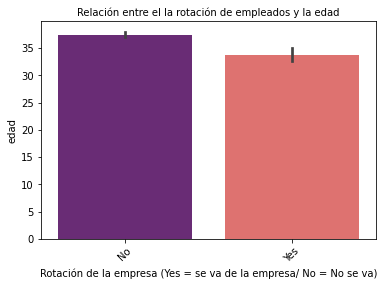

In [146]:
sns.barplot(x = "Attrition", 
               y = "Age", 
               data = df,
               palette = "magma")


plt.xlabel("Rotación de la empresa (Yes = se va de la empresa/ No = No se va)")
plt.ylabel("edad")
plt.xticks(rotation = 45)
plt.title("Relación entre el la rotación de empleados y la edad", fontsize = 10);

In [147]:
#Vamos a estudiar la normalidad de esta variable, para ver si podemos aplicar el test de student. 

# lo primero que hacemos es crear una función para testar la normalidad de los datos
def normalidad(dataframe, columna):
    """
    Evalúa la normalidad de una columna de datos de un DataFrame utilizando la prueba de Shapiro-Wilk.

    Parámetros:
        dataframe (DataFrame): El DataFrame que contiene los datos.
        columna (str): El nombre de la columna en el DataFrame que se va a evaluar para la normalidad.

    Returns:
        None: Imprime un mensaje indicando si los datos siguen o no una distribución normal.
    """

    statistic, p_value = stats.shapiro(dataframe[columna])
    if p_value > 0.05:
        print(f"Para la columna {columna} los datos siguen una distribución normal.")
    else:
        print(f"Para la columna {columna} los datos no siguen una distribución normal.")

In [148]:
normalidad(df ,'Age')

Para la columna Age los datos no siguen una distribución normal.


In [150]:
grupo_si_age = df[df['Attrition'] == 'Yes']['Age']
grupo_no_age = df[df['Attrition'] == 'No']['Age']

In [151]:
# Realizar el test de Mann-Whitney U

stat, p_value = mannwhitneyu(grupo_si_age, grupo_no_age)

# Imprimir los resultados
print("Estadística de prueba U:", stat)
print("Valor p:", p_value)

# Interpretar los resultados
if p_value < 0.05:
    print("Hay evidencia estadística para rechazar la hipótesis nula. Hay diferencias significativas entre los grupos.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula. No hay diferencias significativas entre los grupos.")

Estadística de prueba U: 123999.0
Valor p: 3.3749920113704813e-10
Hay evidencia estadística para rechazar la hipótesis nula. Hay diferencias significativas entre los grupos.


## YearsWithCurrentManager

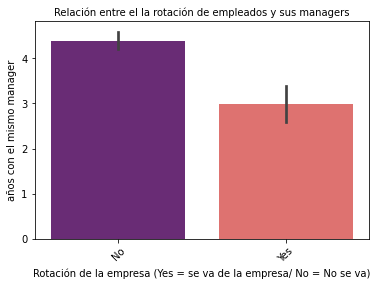

In [153]:
sns.barplot(x = "Attrition", 
               y = "YearsWithCurrManager", 
               data = df,
               palette = "magma")


plt.xlabel("Rotación de la empresa (Yes = se va de la empresa/ No = No se va)")
plt.ylabel("años con el mismo manager")
plt.xticks(rotation = 45)
plt.title("Relación entre el la rotación de empleados y sus managers", fontsize = 10);

In [154]:
#Vamos a estudiar la normalidad de esta variable, para ver si podemos aplicar el test de student. 

# lo primero que hacemos es crear una función para testar la normalidad de los datos
def normalidad(dataframe, columna):
    """
    Evalúa la normalidad de una columna de datos de un DataFrame utilizando la prueba de Shapiro-Wilk.

    Parámetros:
        dataframe (DataFrame): El DataFrame que contiene los datos.
        columna (str): El nombre de la columna en el DataFrame que se va a evaluar para la normalidad.

    Returns:
        None: Imprime un mensaje indicando si los datos siguen o no una distribución normal.
    """

    statistic, p_value = stats.shapiro(dataframe[columna])
    if p_value > 0.05:
        print(f"Para la columna {columna} los datos siguen una distribución normal.")
    else:
        print(f"Para la columna {columna} los datos no siguen una distribución normal.")

In [155]:
normalidad(df ,'YearsWithCurrManager')

Para la columna YearsWithCurrManager los datos no siguen una distribución normal.


In [157]:
grupo_si_manager = df[df['Attrition'] == 'Yes']['YearsWithCurrManager']
grupo_no_manager = df[df['Attrition'] == 'No']['YearsWithCurrManager']

In [158]:
# Realizar el test de Mann-Whitney U

stat, p_value = mannwhitneyu(grupo_si_manager, grupo_no_manager)

# Imprimir los resultados
print("Estadística de prueba U:", stat)
print("Valor p:", p_value)

# Interpretar los resultados
if p_value < 0.05:
    print("Hay evidencia estadística para rechazar la hipótesis nula. Hay diferencias significativas entre los grupos.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula. No hay diferencias significativas entre los grupos.")

Estadística de prueba U: 123616.5
Valor p: 1.4402354109822127e-10
Hay evidencia estadística para rechazar la hipótesis nula. Hay diferencias significativas entre los grupos.


In [ ]:
# Aunque hay diferencias significativas, creemos que tiene que ver con que las personas que llevan más años en la empresa, llevan más años con el mismo manager. No nos da mucha información sobre si la veriable influye o no en la rotación de empleados